# This data about scraping the national weather website data for analyzing with pandas and save it as to csv file

In [1]:
# import our libraries 
import requests
from bs4 import BeautifulSoup

In [2]:
# Requsting the data form the website 
page = requests.get('https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.W7niOfZuLcc')

In [3]:
# parse the html with Beautiful soup 
soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
# Beautifulsoup has content object allow dispaly the html file
soup = BeautifulSoup(page.content, 'html.parser')
# find objcet allow to find certian items inside the hrml file
seven_day = soup.find(id="seven-day-forecast")
# find_all object is similer to find
forecast_items = seven_day.find_all(class_="tombstone-container")
# irerate inside the container of html and get item
tonight = forecast_items[0]
# dispaly out the information from html 
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  Today
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Today: Mostly cloudy, then gradually becoming sunny, with a high near 65. West wind 8 to 14 mph, with gusts as high as 18 mph. " class="forecast-icon" src="newimages/medium/bkn.png" title="Today: Mostly cloudy, then gradually becoming sunny, with a high near 65. West wind 8 to 14 mph, with gusts as high as 18 mph. "/>
 </p>
 <p class="short-desc">
  Decreasing
  <br/>
  Clouds
 </p>
 <p class="temp temp-high">
  High: 65 °F
 </p>
</div>


In [5]:
# Get_text is an obejct wich to get text out of class inside html
# and by assigng diffrerent class we get the information need it and display it out.
period = tonight.find(class_='period-name').get_text()
short_desc = tonight.find(class_='short-desc').get_text()
temp = tonight.find(class_='temp').get_text

print(period)
print(short_desc)
print(temp)

Today
DecreasingClouds
<bound method Tag.get_text of <p class="temp temp-high">High: 65 °F</p>>


In [6]:
# img is type tag inside the html file and by manipulated with title to get text clear
img = tonight.find('img')
desc = img['title']

print(desc)

Today: Mostly cloudy, then gradually becoming sunny, with a high near 65. West wind 8 to 14 mph, with gusts as high as 18 mph. 


In [7]:
# There is a file call tombstone inside html which contain the seven days of the week 
# and other information but only intested about week days and by looping out the file
# got extracted
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['Today',
 'Tonight',
 'Friday',
 'FridayNight',
 'Saturday',
 'SaturdayNight',
 'Sunday',
 'SundayNight',
 'Monday']

In [8]:
# Similer to the previouse code ecxept iterate to each and get them all at once
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]

print(short_descs)
print(temps)
print(descs)

['DecreasingClouds', 'Partly Cloudy', 'Sunny', 'Mostly Clear', 'Sunny', 'Clear', 'Sunny', 'Clear', 'Sunny']
['High: 65 °F', 'Low: 53 °F', 'High: 71 °F', 'Low: 56 °F', 'High: 69 °F', 'Low: 56 °F', 'High: 69 °F', 'Low: 56 °F', 'High: 69 °F']
['Today: Mostly cloudy, then gradually becoming sunny, with a high near 65. West wind 8 to 14 mph, with gusts as high as 18 mph. ', 'Tonight: Partly cloudy, with a low around 53. West wind 12 to 17 mph becoming light southwest  after midnight. Winds could gust as high as 22 mph. ', 'Friday: Sunny, with a high near 71. Calm wind. ', 'Friday Night: Mostly clear, with a low around 56. West wind 5 to 7 mph becoming calm  in the evening. ', 'Saturday: Sunny, with a high near 69. Calm wind becoming west northwest around 6 mph in the afternoon. ', 'Saturday Night: Clear, with a low around 56.', 'Sunday: Sunny, with a high near 69.', 'Sunday Night: Clear, with a low around 56.', 'Monday: Sunny, with a high near 69.']


# Analyzing with pandas

In [9]:
# lets import our library 
import pandas as pd

In [10]:
# Making dataframe and assign each as a dictnory 
weather = pd.DataFrame({'period':periods, 'short_desc':short_descs, 'temp':temps, 'desc':descs})

In [11]:
# lets take a look at it
weather

,desc,period,short_desc,temp
0,"Today: Mostly cloudy, then gradually becoming ...",Today,DecreasingClouds,High: 65 °F
1,"Tonight: Partly cloudy, with a low around 53. ...",Tonight,Partly Cloudy,Low: 53 °F
2,"Friday: Sunny, with a high near 71. Calm wind.",Friday,Sunny,High: 71 °F
3,"Friday Night: Mostly clear, with a low around ...",FridayNight,Mostly Clear,Low: 56 °F
4,"Saturday: Sunny, with a high near 69. Calm win...",Saturday,Sunny,High: 69 °F
5,"Saturday Night: Clear, with a low around 56.",SaturdayNight,Clear,Low: 56 °F
6,"Sunday: Sunny, with a high near 69.",Sunday,Sunny,High: 69 °F
7,"Sunday Night: Clear, with a low around 56.",SundayNight,Clear,Low: 56 °F
8,"Monday: Sunny, with a high near 69.",Monday,Sunny,High: 69 °F


# As we can see there are some information mixes which other and dose not look clear, lets tidy it out

In [14]:
pd.get_option('display.max_columns')

20

In [18]:
pd.set_option('display.max_colwidth', 1000)
weather

,desc,period,short_desc,temp
0,"Today: Mostly cloudy, then gradually becoming sunny, with a high near 65. West wind 8 to 14 mph, with gusts as high as 18 mph.",Today,DecreasingClouds,High: 65 °F
1,"Tonight: Partly cloudy, with a low around 53. West wind 12 to 17 mph becoming light southwest after midnight. Winds could gust as high as 22 mph.",Tonight,Partly Cloudy,Low: 53 °F
2,"Friday: Sunny, with a high near 71. Calm wind.",Friday,Sunny,High: 71 °F
3,"Friday Night: Mostly clear, with a low around 56. West wind 5 to 7 mph becoming calm in the evening.",FridayNight,Mostly Clear,Low: 56 °F
4,"Saturday: Sunny, with a high near 69. Calm wind becoming west northwest around 6 mph in the afternoon.",Saturday,Sunny,High: 69 °F
5,"Saturday Night: Clear, with a low around 56.",SaturdayNight,Clear,Low: 56 °F
6,"Sunday: Sunny, with a high near 69.",Sunday,Sunny,High: 69 °F
7,"Sunday Night: Clear, with a low around 56.",SundayNight,Clear,Low: 56 °F
8,"Monday: Sunny, with a high near 69.",Monday,Sunny,High: 69 °F


In [19]:
# Adjust columns width make it easy to read
weather

,desc,period,short_desc,temp
0,"Today: Mostly cloudy, then gradually becoming sunny, with a high near 65. West wind 8 to 14 mph, with gusts as high as 18 mph.",Today,DecreasingClouds,High: 65 °F
1,"Tonight: Partly cloudy, with a low around 53. West wind 12 to 17 mph becoming light southwest after midnight. Winds could gust as high as 22 mph.",Tonight,Partly Cloudy,Low: 53 °F
2,"Friday: Sunny, with a high near 71. Calm wind.",Friday,Sunny,High: 71 °F
3,"Friday Night: Mostly clear, with a low around 56. West wind 5 to 7 mph becoming calm in the evening.",FridayNight,Mostly Clear,Low: 56 °F
4,"Saturday: Sunny, with a high near 69. Calm wind becoming west northwest around 6 mph in the afternoon.",Saturday,Sunny,High: 69 °F
5,"Saturday Night: Clear, with a low around 56.",SaturdayNight,Clear,Low: 56 °F
6,"Sunday: Sunny, with a high near 69.",Sunday,Sunny,High: 69 °F
7,"Sunday Night: Clear, with a low around 56.",SundayNight,Clear,Low: 56 °F
8,"Monday: Sunny, with a high near 69.",Monday,Sunny,High: 69 °F


In [22]:
# Data type of obsevation
weather.dtypes

desc          object
period        object
short_desc    object
temp          object
dtype: object

In [24]:
# Extracting and creating a new columns of numric tempture
temp_nums = weather['temp'].str.extract('(?P<temp_num>\d+)', expand=False)
weather['temp_num'] = temp_nums.astype('int')
temp_nums

0    65
1    53
2    71
3    56
4    69
5    56
6    69
7    56
8    69
Name: temp_num, dtype: object

In [25]:
weather

,desc,period,short_desc,temp,temp_num
0,"Today: Mostly cloudy, then gradually becoming sunny, with a high near 65. West wind 8 to 14 mph, with gusts as high as 18 mph.",Today,DecreasingClouds,High: 65 °F,65
1,"Tonight: Partly cloudy, with a low around 53. West wind 12 to 17 mph becoming light southwest after midnight. Winds could gust as high as 22 mph.",Tonight,Partly Cloudy,Low: 53 °F,53
2,"Friday: Sunny, with a high near 71. Calm wind.",Friday,Sunny,High: 71 °F,71
3,"Friday Night: Mostly clear, with a low around 56. West wind 5 to 7 mph becoming calm in the evening.",FridayNight,Mostly Clear,Low: 56 °F,56
4,"Saturday: Sunny, with a high near 69. Calm wind becoming west northwest around 6 mph in the afternoon.",Saturday,Sunny,High: 69 °F,69
5,"Saturday Night: Clear, with a low around 56.",SaturdayNight,Clear,Low: 56 °F,56
6,"Sunday: Sunny, with a high near 69.",Sunday,Sunny,High: 69 °F,69
7,"Sunday Night: Clear, with a low around 56.",SundayNight,Clear,Low: 56 °F,56
8,"Monday: Sunny, with a high near 69.",Monday,Sunny,High: 69 °F,69


In [26]:
# extracting and creating a new columns of night
is_night = weather.temp.str.contains('Low')
weather['is_night'] = is_night
is_night

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
Name: temp, dtype: bool

In [27]:
weather

,desc,period,short_desc,temp,temp_num,is_night
0,"Today: Mostly cloudy, then gradually becoming sunny, with a high near 65. West wind 8 to 14 mph, with gusts as high as 18 mph.",Today,DecreasingClouds,High: 65 °F,65,False
1,"Tonight: Partly cloudy, with a low around 53. West wind 12 to 17 mph becoming light southwest after midnight. Winds could gust as high as 22 mph.",Tonight,Partly Cloudy,Low: 53 °F,53,True
2,"Friday: Sunny, with a high near 71. Calm wind.",Friday,Sunny,High: 71 °F,71,False
3,"Friday Night: Mostly clear, with a low around 56. West wind 5 to 7 mph becoming calm in the evening.",FridayNight,Mostly Clear,Low: 56 °F,56,True
4,"Saturday: Sunny, with a high near 69. Calm wind becoming west northwest around 6 mph in the afternoon.",Saturday,Sunny,High: 69 °F,69,False
5,"Saturday Night: Clear, with a low around 56.",SaturdayNight,Clear,Low: 56 °F,56,True
6,"Sunday: Sunny, with a high near 69.",Sunday,Sunny,High: 69 °F,69,False
7,"Sunday Night: Clear, with a low around 56.",SundayNight,Clear,Low: 56 °F,56,True
8,"Monday: Sunny, with a high near 69.",Monday,Sunny,High: 69 °F,69,False


In [28]:
# The weather distrbuation of the seven day weather 
weather.describe()

,temp_num
count,9.000000
mean,62.666667
std,7.262920
min,53.000000
25%,56.000000
50%,65.000000
75%,69.000000
max,71.000000


In [48]:
weather


,desc,period,short_desc,temp,temp_num,is_night
0,"Today: Mostly cloudy, then gradually becoming sunny, with a high near 65. West wind 8 to 14 mph, with gusts as high as 18 mph.",Today,DecreasingClouds,High: 65 °F,65,False
1,"Tonight: Partly cloudy, with a low around 53. West wind 12 to 17 mph becoming light southwest after midnight. Winds could gust as high as 22 mph.",Tonight,Partly Cloudy,Low: 53 °F,53,True
2,"Friday: Sunny, with a high near 71. Calm wind.",Friday,Sunny,High: 71 °F,71,False
3,"Friday Night: Mostly clear, with a low around 56. West wind 5 to 7 mph becoming calm in the evening.",FridayNight,Mostly Clear,Low: 56 °F,56,True
4,"Saturday: Sunny, with a high near 69. Calm wind becoming west northwest around 6 mph in the afternoon.",Saturday,Sunny,High: 69 °F,69,False
5,"Saturday Night: Clear, with a low around 56.",SaturdayNight,Clear,Low: 56 °F,56,True
6,"Sunday: Sunny, with a high near 69.",Sunday,Sunny,High: 69 °F,69,False
7,"Sunday Night: Clear, with a low around 56.",SundayNight,Clear,Low: 56 °F,56,True
8,"Monday: Sunny, with a high near 69.",Monday,Sunny,High: 69 °F,69,False


In [29]:
import matplotlib 
%matplotlib inline

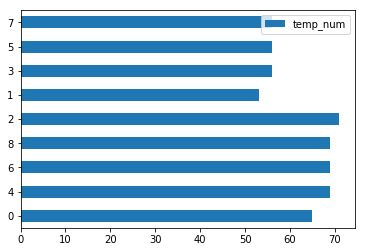

In [51]:
# simple visualization by tmpeture 
weather.sort_values(by='temp').plot(kind='barh')

In [52]:
# Finally, we going to save it as csv file
weather.to_csv('weather-scraping.csv', index=False, encoding='Utf-8')

In [55]:
weather

,desc,period,short_desc,temp,temp_num,is_night
0,"Today: Mostly cloudy, then gradually becoming sunny, with a high near 65. West wind 8 to 14 mph, with gusts as high as 18 mph.",Today,DecreasingClouds,High: 65 °F,65,False
1,"Tonight: Partly cloudy, with a low around 53. West wind 12 to 17 mph becoming light southwest after midnight. Winds could gust as high as 22 mph.",Tonight,Partly Cloudy,Low: 53 °F,53,True
2,"Friday: Sunny, with a high near 71. Calm wind.",Friday,Sunny,High: 71 °F,71,False
3,"Friday Night: Mostly clear, with a low around 56. West wind 5 to 7 mph becoming calm in the evening.",FridayNight,Mostly Clear,Low: 56 °F,56,True
4,"Saturday: Sunny, with a high near 69. Calm wind becoming west northwest around 6 mph in the afternoon.",Saturday,Sunny,High: 69 °F,69,False
5,"Saturday Night: Clear, with a low around 56.",SaturdayNight,Clear,Low: 56 °F,56,True
6,"Sunday: Sunny, with a high near 69.",Sunday,Sunny,High: 69 °F,69,False
7,"Sunday Night: Clear, with a low around 56.",SundayNight,Clear,Low: 56 °F,56,True
8,"Monday: Sunny, with a high near 69.",Monday,Sunny,High: 69 °F,69,False
